# SVM
In this exercise, you will be using support vector machines (SVMs) to build
a spam classifier.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import svm
%matplotlib inline

In [ ]:
raw_data = loadmat('data/ex6data1.mat')
raw_data

In [4]:
df = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
df['y'] = raw_data['y']
df.head()

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


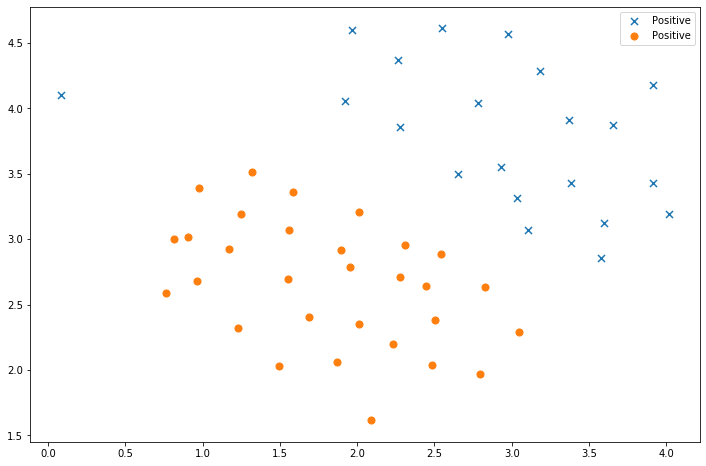

In [8]:
positive = df[df['y'] == 1]
negative = df[df['y'] == 0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive.X1, positive.X2, s=50, marker='x', label='Positive')
ax.scatter(negative.X1, negative.X2, s=50, marker='o', label='Positive')
ax.legend()
plt.show()

# Decision function

In [26]:
svc1 = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc1.fit(df[["X1",'X2']], df.y)
svc1.score(df[['X1','X2']], df.y)

C:\Users\Administrator\Anaconda3\envs\nlp\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9803921568627451

In [29]:
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc2.fit(df[["X1",'X2']], df.y)
svc2.score(df[['X1','X2']], df.y)

C:\Users\Administrator\Anaconda3\envs\nlp\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9411764705882353

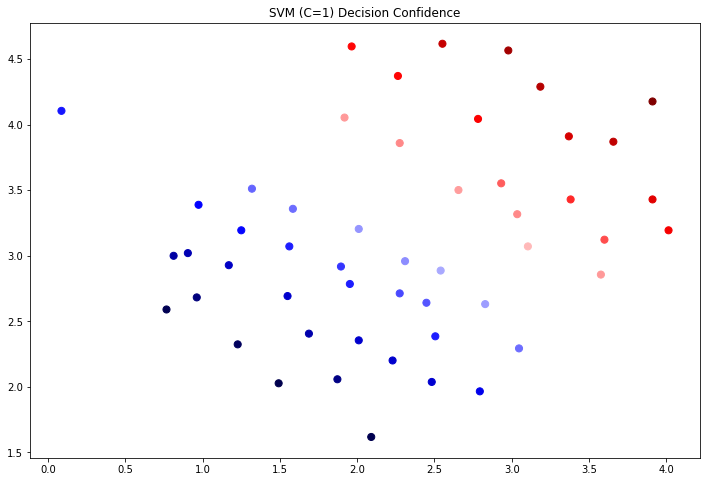

In [30]:
df['SVM 1 Confidence'] = svc1.decision_function(df[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df.X1, df.X2, s=50, c=df['SVM 1 Confidence'], cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')
plt.show()

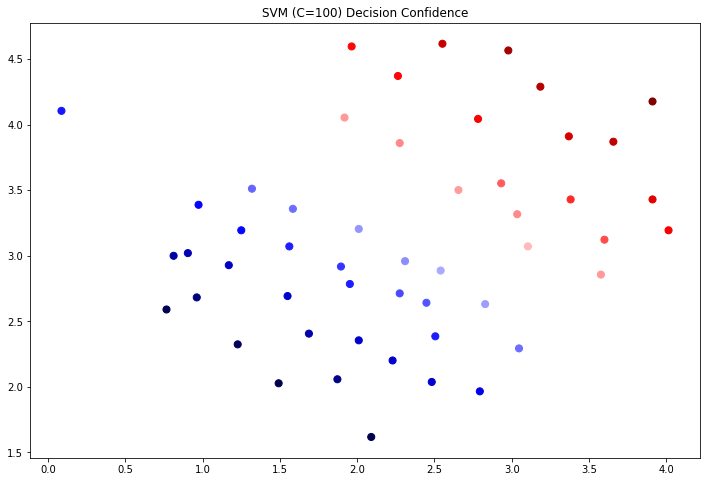

In [32]:
df['SVM 2 Confidence'] = svc2.decision_function(df[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df.X1, df.X2, s=50, c=df['SVM 1 Confidence'], cmap='seismic')
ax.set_title('SVM (C=100) Decision Confidence')
plt.show()

# Gaussian kernel

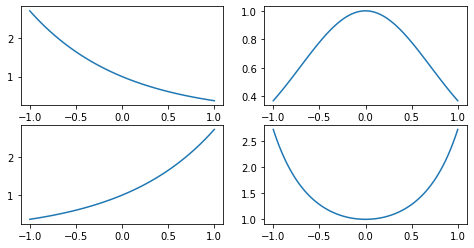

In [72]:
a1 = np.linspace(-1,1,100)
fig, ax = plt.subplots(2,2, figsize=(8,4))
ax[0,0].plot(a1, np.exp(-a1))
ax[0,1].plot(a1, np.exp(-a1**2))
ax[1,0].plot(a1, np.exp(a1))
ax[1,1].plot(a1, np.exp(a1**2))
plt.show()

In [47]:
def gaussian_kernel(x1, x2, sigma):
    dis = np.linalg.norm(x1 - x2)
    return np.exp(-(dis ** 2) / (2 * (sigma ** 2)))

In [48]:
x1 = np.array([1., 2., 1.])
x2 = np.array([0., 4., -1.])
sigma = 2
gaussian_kernel(x1, x2, sigma)

0.32465246735834974

In [76]:
raw_data2 =loadmat('data/ex6data2.mat')
df2 = pd.DataFrame(raw_data2['X'], columns=['X1','X2'])
df2['y'] = raw_data2['y']
df2.head()

,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


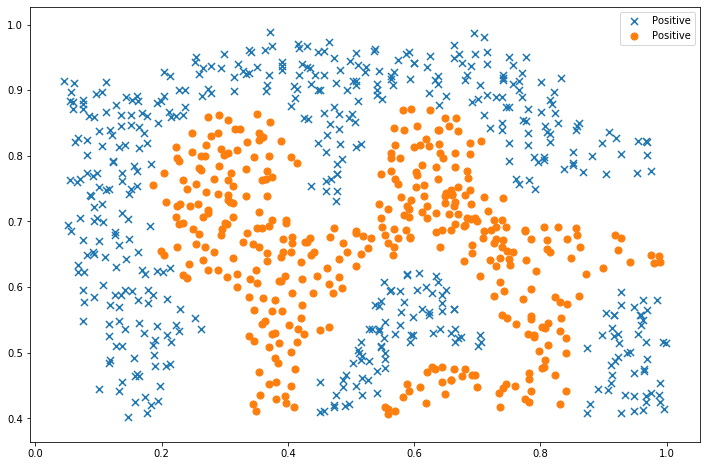

In [75]:
positive = df2[df2['y'] == 1]
negative = df2[df2['y'] == 0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive.X1, positive.X2, s=50, marker='x', label='Positive')
ax.scatter(negative.X1, negative.X2, s=50, marker='o', label='Positive')
ax.legend()
plt.show()

In [77]:
svc = svm.SVC(C=100, gamma=10, probability=True)
svc

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [79]:
svc.fit(df2[['X1', 'X2']], df2.y)
svc.score(df2[['X1', 'X2']], df2.y)

0.9698725376593279

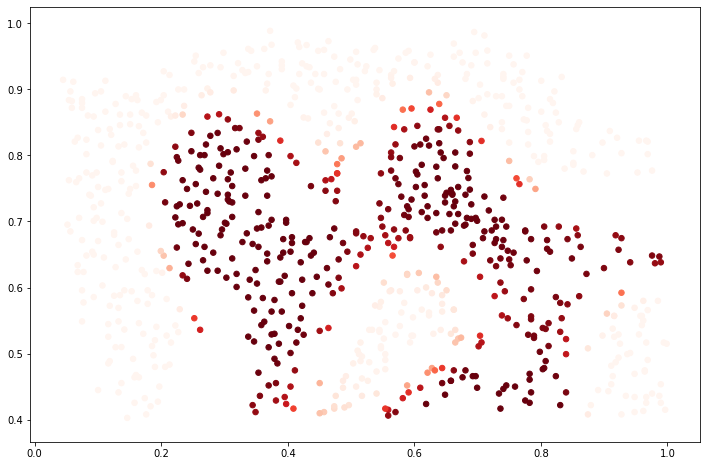

In [83]:
df2['Probability'] = svc.predict_proba(df2[['X1', 'X2']])[:, 0]
plt.figure(figsize=(12,8))
plt.scatter(df2.X1, df2.X2, s=30, c=df2.Probability, cmap='Reds')
plt.show()

# Compare and selection

In [86]:
raw_data3 = loadmat('data/ex6data3.mat')
X = raw_data3['X']
Xval = raw_data3['Xval']
y = raw_data3['y'].ravel()
yval = raw_data3['yval'].ravel()

C_values = [.01, .03, .1, .3, 1, 3, 10, 30, 100]
gamma_values = [.01, .03, .1, .3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {"C": None, 'gamma': None}

for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, y)
        score = svc.score(Xval, yval)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma
best_score, best_params

(0.965, {'C': 0.3, 'gamma': 100})

In [88]:
spam_train = loadmat('data/spamTrain.mat')
spam_test = loadmat('data/spamTest.mat')
spam_train.keys(), spam_test.keys()

(dict_keys(['__header__', '__version__', '__globals__', 'X', 'y']),
 dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest']))

In [89]:
X = spam_train['X']
Xtest = spam_test['Xtest']
y = spam_train['y'].ravel()
ytest = spam_test['ytest'].ravel()
X.shape, y.shape, Xtest.shape, ytest.shape

((4000, 1899), (4000,), (1000, 1899), (1000,))

In [91]:
svc = svm.SVC(gamma='auto')
svc.fit(X, y)
print(f"Training accuracy = {np.round(svc.score(X, y) * 100, 2)}%")

Training accuracy = 94.4%


In [92]:
print(f"Training accuracy = {np.round(svc.score(Xtest, ytest) * 100, 2)}%")

Training accuracy = 95.3%
